# Imports

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, MaxPooling2D, GlobalAveragePooling2D, Dense, MaxPool2D
from tensorflow.keras.utils import to_categorical
from keras.layers import ReLU, GlobalAvgPool2D, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from PIL import Image

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set up the testing images and the training images. Each images pass through a resize and normalization function.

# Lidando com as Imagens

In [5]:
imagesTesting = []
labelsTesting = []
imagesTraining = []
labelsTraining = []
classLabels = ['barberry', 'bayberry', 'beach plum', 'bearberry', 'black berry', 'black cherry', 'blueberry', 'ceylon gooseberry', 'chokeberry', 'crowberry']

target_size = (224, 224)


def readTestingImages(i):
    os.chdir('/content/drive/MyDrive/CNN_SOURCE/Testing/Testing')

    for filename in os.listdir():
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read Image
            image = cv2.imread(filename)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Resize the image
            image_resized = cv2.resize(image_rgb, target_size)

            # Normalize the image
            image_normalized = image_resized / 255.0

            if i < 150:
              imagesTesting.append(image_normalized)

            # Extract label from filename
            labels = filename.rsplit("_", 1)
            label = labels[0].replace('_', ' ')

            # Get the index of the label in classLabels
            label_index = classLabels.index(label)

            if i < 150:
              labelsTesting.append(label_index)

            i += 1
            if i == 200:
              i = 0

i = 1
def readTrainingImages(i):
    os.chdir('/content/drive/MyDrive/CNN_SOURCE/Training/Training')

    for filename in os.listdir():
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read Image
            image = cv2.imread(filename)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Resize the image
            image_resized = cv2.resize(image_rgb, target_size)

            # Normalize the image
            image_normalized = image_resized / 255.0

            if i < 50:
              imagesTraining.append(image_normalized)

            # Extract label from filename
            labels = filename.rsplit("_", 1)
            label = labels[0].replace('_', ' ')

            # Get the index of the label in classLabels
            label_index = classLabels.index(label)

            if i < 50:
              labelsTraining.append(label_index)

            i += 1
            if i == 200:
              i = 0

readTestingImages(1)
readTrainingImages(1)

Set up the CNN architecture

We start with a architecture of 7 layers. 2 are convolutional layers. 2 are max-pooling layers, a layer to flatten the previous output into a 1D vector, and 2 connected layers (dense layers).

**model = models.Sequential()**: this creates a sequential model, which is a linear stack of layers

**model.add(layers.Vonc2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))**: adds a 2D convolutional layer to the model with 32 filters. The number of filters determine the number of channels of the output feature maps. Each filter produces one feature map, and these feature maps collectively capture different aspects of the input data.

**model.add(layers.MaxPooling2D((2, 2)))**: adds a max-pooling layer to the model with a pool size of 2x2. Max-pooling reduces the spatial dimensions of the feature maps.

**model.add(layers.Flatten())**: this flattens the output of the previous layer into a 1D vector. This reshapes the multi-dimensional feature maps into a 1D vector that can be fed into the fully connected layer. Each element in the vector corresponds to a specific feature or activation in the feature map.

**model.add(layers.Dense(64, activation='relu'))**: This adds a fully connected (dense) layer with 64 units and the ReLU activation function.

**model.add(layers.Dense(10))**: This adds the final fully connected layer with 10 units. Since this is a classification problem with 10 classes, this layer will produce the output logits for each class.

# Construindo Modelo

In [6]:
model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False, input_shape=(224,224,3), pooling='avg',classes=10, weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(layers.Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

94765736/94765736 [==============================] - 3s 0us/step


# Treinando Modelo

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(np.array(imagesTraining), np.array(labelsTraining), epochs=30, validation_data=(np.array(imagesTesting), np.array(labelsTesting)))

Epoch 1/30
16/16 [==============================] - 25s 770ms/step - loss: 2.5510 - accuracy: 0.1080 - val_loss: 2.3474 - val_accuracy: 0.1400
Epoch 2/30
16/16 [==============================] - 7s 433ms/step - loss: 2.3241 - accuracy: 0.1200 - val_loss: 2.2942 - val_accuracy: 0.1333
Epoch 3/30
16/16 [==============================] - 6s 368ms/step - loss: 2.2572 - accuracy: 0.1820 - val_loss: 2.3619 - val_accuracy: 0.1140
Epoch 4/30
16/16 [==============================] - 7s 434ms/step - loss: 2.2721 - accuracy: 0.1620 - val_loss: 2.3525 - val_accuracy: 0.1293
Epoch 5/30
16/16 [==============================] - 7s 438ms/step - loss: 2.2529 - accuracy: 0.1540 - val_loss: 2.2913 - val_accuracy: 0.1327
Epoch 6/30
16/16 [==============================] - 6s 377ms/step - loss: 2.2607 - accuracy: 0.1780 - val_loss: 2.3095 - val_accuracy: 0.1667
Epoch 7/30
16/16 [==============================] - 7s 441ms/step - loss: 2.2055 - accuracy: 0.1760 - val_loss: 2.3048 - val_accuracy: 0.1760
Epoch

# Avaliação do Modelo

In [11]:
imagesTesting = np.array(imagesTesting).astype('float32')
labelsTesting = np.array(labelsTesting)

# Avaliação do modelo
test_loss, test_acc = model.evaluate(imagesTesting, labelsTesting)
print('Acurácia final do modelo: %.2f%%' % (test_acc * 100))

47/47 [==============================] - 5s 97ms/step - loss: 3.0247 - accuracy: 0.1000
Acurácia final do modelo: 10.00%


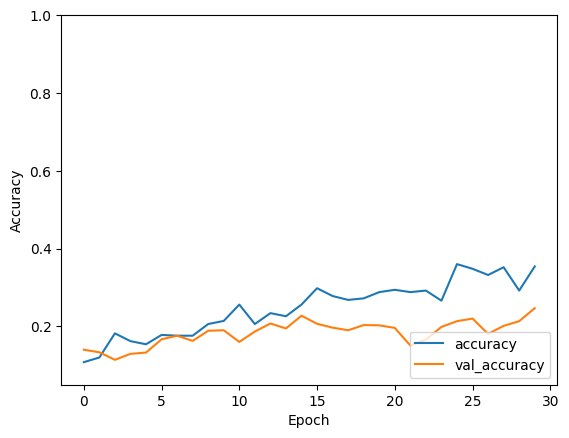

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.05, 1])
plt.legend(loc='lower right')

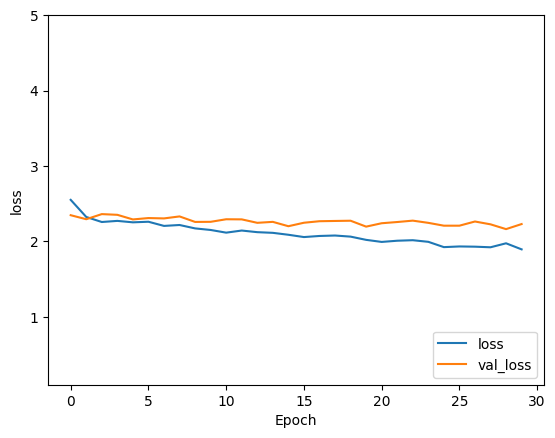

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.1, 5])
plt.legend(loc='lower right')

# Salvando Modelo

In [16]:
# Salvar o modelo
model.save('/content/drive/MyDrive/CNN_SOURCE/Modelos/cnn_modelo_resnet.h5')